In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [58]:
# ne_path = "/Users/charlottemyers/projects/jlab/spectro/data/Nate_Charlotte_929_cal2.txt"
# hg_path = "/Users/charlottemyers/projects/jlab/spectro/data/Nate_Charlotte_929_cal.txt"

hg_path = "/Users/charlottemyers/projects/jlab/spectro/data/Nate_Charlotte_1001_cal1.txt"
ne_path = "/Users/charlottemyers/projects/jlab/spectro/data/Nate_Charlotte_1001_cal2.txt"


# different files have different encodings for some reason
if "1001" in hg_path:
    enc = "utf-16"
else:
    enc = "utf-8"


In [48]:
#### KNOWN LINES
ne_lines = np.array([
    5852.4879, 6029.9969, 6074.3377, 6143.0626, 6163.5939,
    6217.2812, 6266.4950, 6334.4278, 6382.9917, 6402.2480,
    6506.5281, 6598.9529, 6678.2762, 6717.0430, 6929.4673,
    7032.4131, 7173.9381, 7245.1666], dtype=float)

hg_lines = np.array([
    4046.563, 4358.335, 5460.735, 5769.598, 5790.663,
    6234.062, 6907.473, 7065.190, 7281.348], dtype=float)

known_lines = np.concatenate((ne_lines, hg_lines))

Text(0, 0.5, 'Photon CPS')

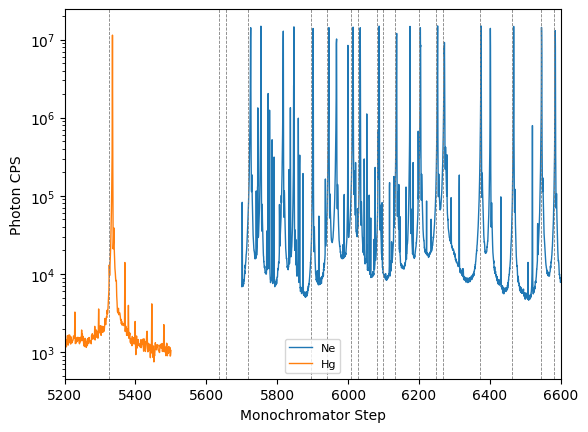

In [52]:
df_ne = pd.read_csv(ne_path, sep=r"\s+")
step_ne = df_ne["Monochromator-step"].to_numpy()
cps_ne  = df_ne["cps"].to_numpy()

df_hg = pd.read_csv(
    hg_path,
    sep="\t",
    encoding=enc,      # try 'utf-16' first
    engine="python",        # more tolerant with encodings/delims
    usecols=[0, 1],         # first two columns only
    header=0,               # first line is the header row
    names=["step", "cps"]   # rename to something simple
)

step_hg = df_hg["step"].to_numpy()
cps_hg  = df_hg["cps"].to_numpy()

plt.plot(step_ne, cps_ne, lw=1, label ="Ne")
plt.plot(step_hg, cps_hg, lw=1, label ="Hg")


for line in known_lines:
    plt.axvline(line - 135, color="gray", ls="--", lw = 0.6)

plt.xlim(5200, 6600)
plt.legend(fontsize = 8)
plt.yscale("log")
plt.xlabel("Monochromator Step")
plt.ylabel("Photon CPS")


In [53]:
sigma_thresh = 0.5 #threshold for observed peaks

In [ ]:
# get observed peaks - maximum points in the spectrum
observed_peaks = step_ne[cps_ne > np.mean(cps_ne) + sigma_thresh* np.std(cps_ne)]
print(f"Observed peaks (steps) before averaging: {observed_peaks}")
# if peaks are within 2 angstroms of each other, avergage them
for i in range(len(observed_peaks)-1, 0, -1):
    if observed_peaks[i] - observed_peaks[i-1] < 2:
        avg_peak = (observed_peaks[i] + observed_peaks[i-1]) / 2
        observed_peaks[i-1] = avg_peak
        observed_peaks = np.delete(observed_peaks, i)
print(f"Observed peaks (steps) after averaging: {observed_peaks}")

Observed peaks (steps) before averaging: [5723.6 5724.  5724.4 5724.8 5725.2 5725.6 5745.2 5753.6 5754.  5754.4
 5774.4 5778.4 5816.  5816.4 5816.8 5817.2 5837.2 5846.4 5846.8 5847.2
 5847.6 5901.2 5901.6 5945.2 5945.6 5946.  5966.4 5966.8 5967.2 5967.6
 5999.2 5999.6 6012.8 6013.2 6013.6 6014.  6014.4 6014.8 6034.  6034.4
 6034.8 6087.2 6087.6 6088.  6136.  6136.4 6136.8 6137.2 6174.4 6174.8
 6175.2 6203.2 6203.6 6204.  6204.4 6204.8 6205.2 6251.6 6252.  6252.4
 6252.8 6253.2 6270.  6270.4 6270.8 6271.2 6271.6 6272.  6272.4 6272.8
 6374.4 6374.8 6375.2 6375.6 6376.  6401.2 6401.6 6402.  6466.8 6467.2
 6467.6 6468.  6545.2 6545.6 6546.  6546.4 6546.8 6584.  6584.4 6584.8
 6585.2]
Observed peaks (steps) after averaging: [5723.9875   5745.2      5753.9      5774.4      5778.4      5816.35
 5837.2      5846.75     5901.4      5945.5      5966.75     5999.4
 6013.1875   6034.3      6087.5      6136.35     6174.7      6203.5875
 6251.975    6270.396875 6374.775    6401.5      6467.15     65

In [36]:
observed_peaks_hg = step_hg[cps_hg > np.mean(cps_hg) + sigma_thresh* np.std(cps_hg)]
print(f"Observed Hg peaks (steps) before averaging: {observed_peaks_hg}")

# if peaks are within 2 angstroms of each other, avergage them
for i in range(len(observed_peaks_hg)-1, 0, -1):
    if observed_peaks_hg[i] - observed_peaks_hg[i-1] < 2:
        avg_peak = (observed_peaks_hg[i] + observed_peaks_hg[i-1]) / 2
        observed_peaks_hg[i-1] = avg_peak
        observed_peaks_hg = np.delete(observed_peaks_hg, i)
print(f"Observed Hg peaks (steps) after averaging: {observed_peaks_hg}")

Observed Hg peaks (steps) before averaging: [4237 5335 5664]
Observed Hg peaks (steps) after averaging: [4237 5335 5664]


In [ ]:
# def match_and_fit_poly(observed_peaks, ref_wl, deg=3, tol=8.0, offset0=None):
#     obs = np.asarray(observed_peaks, float)
#     ref = np.asarray(ref_wl, float)

#     if offset0 is None:
#         j = np.argmin(np.abs(obs[:, None] - ref[None, :]), axis=1)
#         offset0 = np.median(obs - ref[j])

#     # nearest matches with one-to-one selection
#     pred_steps = ref - offset0
#     d = np.abs(obs[:, None] - pred_steps[None, :])
#     pairs = np.array(np.unravel_index(np.argsort(d, axis=None), d.shape)).T

#     used_obs = set(); used_ref = set()
#     matched_obs, matched_ref = [], []
#     for io, ir in pairs:
#         if d[io, ir] > tol: break
#         if io in used_obs or ir in used_ref: continue
#         used_obs.add(io); used_ref.add(ir)
#         matched_obs.append(obs[io]); matched_ref.append(ref[ir])

#     matched_obs = np.array(matched_obs)
#     matched_ref = np.array(matched_ref)

#     if len(matched_obs) < deg + 1:
#         raise RuntimeError(f"Not enough matches ({len(matched_obs)}) for degree {deg} fit. Increase tol or add lines.")

#     # polynomial fit
#     coeff = np.polyfit(matched_obs, matched_ref, deg)
#     p = np.poly1d(coeff)

#     # residuals at matched peaks
#     resid = matched_ref - p(matched_obs)
#     rms = np.sqrt(np.mean(resid**2))

#     return p, coeff, matched_obs, matched_ref, resid, rms


# observed_total = np.concatenate([observed_peaks, observed_peaks_hg])
# known_lines = np.concatenate([ne_lines, hg_lines])

# # --- run it ---
# p, coeff, m_obs, m_ref, resid, rms = match_and_fit_poly(observed_total, known_lines, deg=2, tol=15.0, offset0=135.0)
# print("λ(step) = ", " + ".join(f"{c:.6g}*step^{i}" for i, c in zip(range(len(coeff)-1, -1, -1), coeff)))
# print(f"Matches: {len(m_obs)}, RMS = {rms:.3f} Å")

# fit_function = p
# def p(x): return fit_function(x)
# #  match table
# match_tbl = pd.DataFrame({
#     "Ref λ (Å)": m_ref,
#     "Obs step": m_obs,
#     "Pred λ from fit": p(m_obs),
#     "Residual (Å)": resid
# }).sort_values("Ref λ (Å)")
# print(match_tbl.to_string(index=False, float_format=lambda x: f"{x:10.3f}"))

λ(step) =  6.29152e-07*step^2 + 0.997629*step^1 + 121.146*step^0
Matches: 16, RMS = 0.343 Å
 Ref λ (Å)   Obs step  Pred λ from fit  Residual (Å)
  4358.335   4236.000         4358.393        -0.058
  5460.735   5334.000         5460.401         0.334
  5852.488   5723.988         5852.177         0.311
  6029.997   5901.400         6030.467        -0.470
  6074.338   5945.500         6074.791        -0.453
  6143.063   6013.188         6142.827         0.236
  6163.594   6034.300         6164.050        -0.456
  6217.281   6087.500         6217.529        -0.248
  6266.495   6136.350         6266.639        -0.144
  6334.428   6203.587         6334.239         0.189
  6382.992   6251.975         6382.891         0.101
  6402.248   6270.397         6401.414         0.834
  6506.528   6374.775         6506.376         0.153
  6598.953   6467.150         6599.278        -0.325
  6678.276   6545.575         6678.159         0.117
  6717.043   6584.350         6717.162        -0.119


In [66]:
# --- greedy nearest one-to-one matching with a coarse offset ---

def _match_one_spectrum(obs_peaks, ref_wl, label, tol=10.0, offset0=None):
    obs = np.asarray(obs_peaks, float)
    ref = np.asarray(ref_wl, float)
    # coarse offset: obs ~ ref + offset
    if offset0 is None:
        j = np.argmin(np.abs(obs[:, None] - ref[None, :]), axis=1)
        offset0 = np.median(obs - ref[j])

    pred_steps = ref + offset0
    d = np.abs(obs[:, None] - pred_steps[None, :])
    order = np.argsort(d, axis=None)
    used_o = set(); used_r = set()
    m_obs, m_ref, lab = [], [], []

    for k in order:
        io, ir = divmod(k, d.shape[1])
        if d[io, ir] > tol: break
        if io in used_o or ir in used_r:
            continue
        used_o.add(io); used_r.add(ir)
        m_obs.append(obs[io]); m_ref.append(ref[ir]); lab.append(label)

    return np.array(m_obs), np.array(m_ref), np.array(lab), float(offset0)

# --- match both spectra, fit polynomial, build outputs ---
def calibrate_two_spectra(
    obs_peaks_ne, ref_ne,
    obs_peaks_hg, ref_hg,
    deg=3, tol=15.0, shared_offset=None
):
    m_ne_obs, m_ne_ref, lbl_ne, off_ne = _match_one_spectrum(
        obs_peaks_ne, ref_ne, "Ne", tol=tol, offset0=shared_offset
    )
    m_hg_obs, m_hg_ref, lbl_hg, off_hg = _match_one_spectrum(
        obs_peaks_hg, ref_hg, "Hg", tol=tol, offset0=shared_offset
    )

    m_obs = np.concatenate([m_ne_obs, m_hg_obs])
    m_ref = np.concatenate([m_ne_ref, m_hg_ref])
    labels = np.concatenate([lbl_ne, lbl_hg])

    if len(m_obs) < deg + 1:
        raise RuntimeError(f"Only {len(m_obs)} matches; need at lest {deg+1} for a degree-{deg} fit. Increase tol or add lines.")

    coeff = np.polyfit(m_obs, m_ref, deg)
    p = np.poly1d(coeff)
    resid = m_ref - p(m_obs)
    rms = float(np.sqrt(np.mean(resid**2)))

    match_tbl = pd.DataFrame(
        {"species": labels, "Ref λ (Å)": m_ref, "Obs step": m_obs,
         "λ_fit(Obs step)": p(m_obs), "Residual (Å)": resid}
    ).sort_values(["species", "Ref λ (Å)"])

    return p, coeff, match_tbl, rms, {"offset_ne": off_ne, "offset_hg": off_hg}

def _poly_str(coeff):
    n = len(coeff) - 1
    terms = []
    for i, c in enumerate(coeff):
        pwr = n - i
        if pwr == 0:
            terms.append(f"{c:.6g}")
        elif pwr == 1:
            terms.append(f"{c:.6g}·step")
        else:
            terms.append(f"{c:.6g}·step^{pwr}")
    return "λ(step) = " + " + ".join(terms)

# --- run calibration ---
# observed_peaks, observed_peaks_hg, ne_lines, hg_lines
p, coeff, match_tbl, rms, offsets = calibrate_two_spectra(
    observed_peaks, ne_lines,
    observed_peaks_hg, hg_lines,
    deg=2, tol=15.0, shared_offset=-135.0
)

print(_poly_str(coeff))
print(f"RMS = {rms:.2f} Å   N = {len(match_tbl)}   offsets: {offsets}")
print(match_tbl.to_string(index=False, float_format=lambda x: f"{x:10.3f}"))


λ(step) = 6.90035e-07·step^2 + 0.99753·step + 119.35
RMS = 0.39 Å   N = 17   offsets: {'offset_ne': -135.0, 'offset_hg': -135.0}
species  Ref λ (Å)   Obs step  λ_fit(Obs step)  Residual (Å)
     Hg   4358.335   4237.000         4358.272         0.063
     Hg   5460.735   5335.000         5460.812        -0.077
     Hg   5790.663   5664.000         5791.496        -0.833
     Ne   5852.488   5723.988         5851.807         0.681
     Ne   6029.997   5901.400         6030.205        -0.208
     Ne   6074.338   5945.500         6074.556        -0.218
     Ne   6143.063   6013.188         6142.635         0.428
     Ne   6163.594   6034.300         6163.871        -0.277
     Ne   6217.281   6087.500         6217.384        -0.103
     Ne   6266.495   6136.350         6266.526        -0.031
     Ne   6334.428   6203.587         6334.170         0.258
     Ne   6382.992   6251.975         6382.854         0.138
     Ne   6402.248   6270.397         6401.389         0.859
     Ne   6506.52

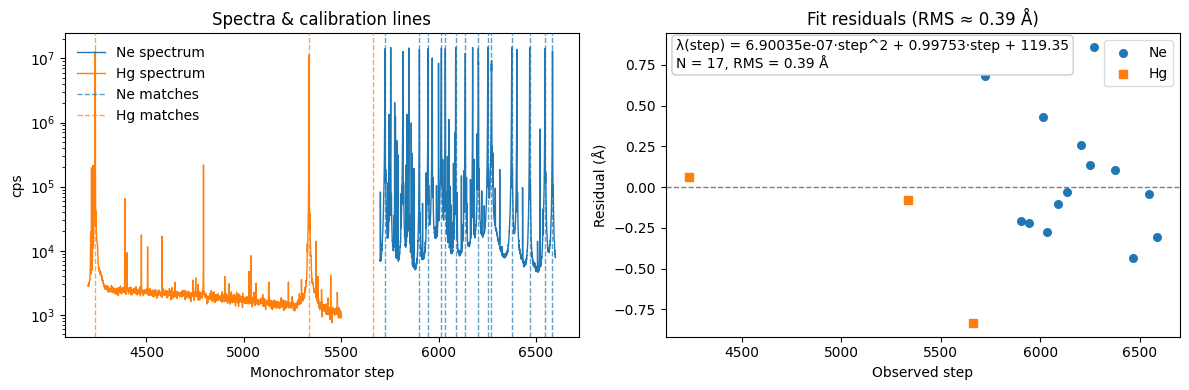

In [67]:
# --- plots: spectra + matched peaks, and residuals colored by species ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# left: raw spectra with matched vertical lines at matched peaks
ax[0].plot(step_ne, cps_ne,    lw=1, label="Ne spectrum")
ax[0].plot(step_hg, cps_hg, lw=1, label="Hg spectrum")

mask_ne = match_tbl["species"].to_numpy() == "Ne"
mask_hg = ~mask_ne
m_obs   = match_tbl["Obs step"].to_numpy()

ne_color = ax[0].lines[0].get_color()
hg_color = ax[0].lines[1].get_color()

first = True
for x in m_obs[mask_ne]:
    ax[0].axvline(x, color=ne_color, ls="--", lw=1.0, alpha=0.7, zorder=3,
                  label="Ne matches" if first else None)
    first = False

first = True
for x in m_obs[mask_hg]:
    ax[0].axvline(x, color=hg_color, ls="--", lw=1.0, alpha=0.7, zorder=3,
                  label="Hg matches" if first else None)
    first = False

ax[0].set_xlabel("Monochromator step")
ax[0].set_ylabel("cps")
ax[0].set_title("Spectra & calibration lines")
ax[0].legend(frameon=False, loc="best")
ax[0].set_yscale("log")

# right: residuals by species
resid = match_tbl["Residual (Å)"].to_numpy()
ax[1].axhline(0, lw=1, ls="--", color="gray")
ax[1].scatter(m_obs[mask_ne], resid[mask_ne], s=30, marker="o", label="Ne")
ax[1].scatter(m_obs[mask_hg], resid[mask_hg], s=30, marker="s", label="Hg")
ax[1].set_xlabel("Observed step")
ax[1].set_ylabel("Residual (Å)")
ax[1].set_title(f"Fit residuals (RMS ≈ {rms:.2f} Å)")
ax[1].legend(frameon=True, loc="best", framealpha=0.7)
# log scale

# annotate polynomial on residual plot
ax[1].text(
    0.02, 0.98,
    _poly_str(coeff) + f"\nN = {len(match_tbl)}, RMS = {rms:.2f} Å",
    transform=ax[1].transAxes, va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.8")
)

plt.tight_layout()

plt.show()

In [ ]:
## saved calibration functions (list of params)

DIR = "/Users/charlottemyers/projects/jlab/spectro/cal_functions"
path = DIR + "/1001.pkl"


#### SAVE
calib_data = {
        "coeff": coeff,
        "function": p,
        "order": 2
}

with open(path, "wb") as f:
    pickle.dump(calib_data, f)

# calib_data_101 = {
#     "101": {
#         "coeff": coeff,
#         "function": p,
#         "order": 2
#     }
# }

# with open("/Users/charlottemyers/projects/jlab/spectro/cal_functions.pkl", "wb") as f:
#     pickle.dump(calib_data_101, f)